# Train and Predict

This example notebook walks through the steps of training a new model then using that model with Planet Scope imagery to predict snow covered areas (SCA).

In [1]:
import glob

import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import planetsca as ps

/home/jovyan/envs/planetenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Train a new model

Open the training data that we've previously created

In [2]:
training_data_filepath = "./example_training_data/example_training_data.csv"
df_train = pd.read_csv(training_data_filepath)

In [3]:
df_train.head()

,blue,green,red,nir,label
0,0.3814,0.3949,0.3867,0.4345,0
1,0.3843,0.3917,0.3815,0.4254,0
2,0.3790,0.3907,0.3750,0.4305,0
3,0.3828,0.3830,0.3826,0.4229,0
4,0.3821,0.3759,0.3877,0.4065,0


Specify where we'd like to save our new model, as well as some information about the model performance

In [12]:
new_model_filepath = "./example_model/example_random_forest_binary_sca.joblib"
new_model_score_filepath = "./example_model/example_random_forest_binary_sca_scores.csv"

Repeat times: 4
F1-score: 0.99793 (0.00004)
Balanced Accuracy: 0.99468 (0.00013)
Accuracy: 0.99689 (0.00006)
Model saved to ./example_model/random_forest_20240116_binary_174K.joblib
Model scores saved to ./example_model/random_forest_20240116_binary_174K_scores.csv
Total time used: 25.2


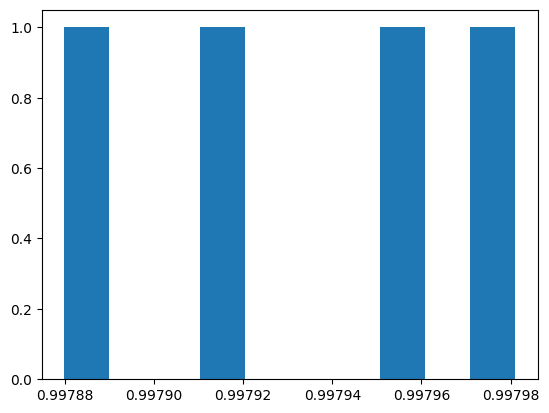

In [5]:
model = ps.train.train_model(
    df_train,
    new_model_filepath,
    new_model_score_filepath,
    n_estimators=10,
    max_depth=10,
    max_features=4,
    random_state=1,
    n_splits=2,
    n_repeats=2,
)

Inspect the resulting model object

In [13]:
model

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=10,
                       random_state=1)

## Make predictions

Now use this model to predict SCA in a set of new Planet images

In [14]:
# get a list of all the image filepaths
ps_image_filepaths = glob.glob("./example_images*/*/PSScene/*SR_clip.tif")

In [15]:
# where we want to save the resulting SCA geotif images created from the Planet images
output_dirpath = "./example_images/SCA/"

In [16]:
# run the model to predict
sca_image_paths = ps.predict.predict_sca(
    planet_path=ps_image_filepaths,
    model=model,  # can also read model from filepath: new_model_filepath
    output_dirpath=output_dirpath,
)

Start to predict: 20240116_174947_73_2483_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240116_174947_73_2483_3B_AnalyticMS_SR_clip_SCA.tif
Start to predict: 20240116_170700_24_24b0_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240116_170700_24_24b0_3B_AnalyticMS_SR_clip_SCA.tif
Start to predict: 20240127_174951_95_247d_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240127_174951_95_247d_3B_AnalyticMS_SR_clip_SCA.tif
Start to predict: 20240116_170156_41_24c1_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240116_170156_41_24c1_3B_AnalyticMS_SR_clip_SCA.tif
Start to predict: 20240116_174947_73_2483_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240116_174947_73_2483_3B_AnalyticMS_SR_clip_SCA.tif
Start to predict: 20240123_170724_19_24b

Visualize the results! (here we'll just look at the first two)

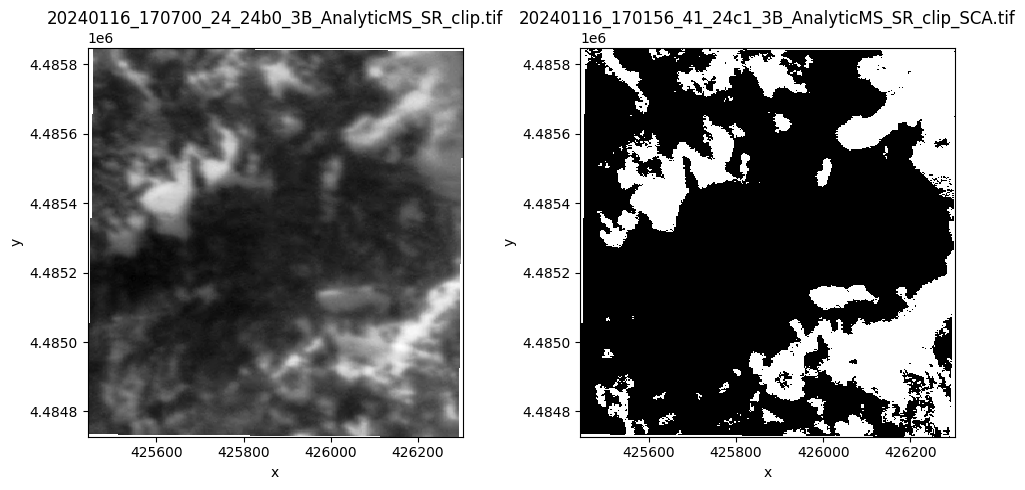

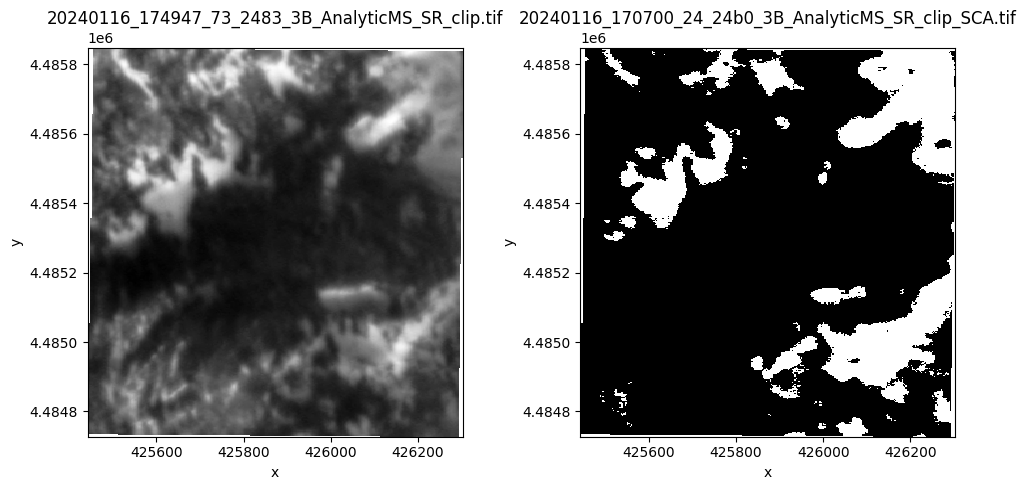

In [18]:
ps_image_filepaths.sort()
sca_image_paths.sort()

for ps_image_filepath, sca_image_filepath in zip(
    ps_image_filepaths[:2], sca_image_paths[:2]
):
    ps_image = xr.open_dataset(ps_image_filepath)
    sca_image = xr.open_dataset(sca_image_filepath)

    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), tight_layout=True)
    ps_image.isel(band=0).band_data.plot(ax=ax1, cmap="Greys_r", add_colorbar=False)
    sca_image.isel(band=0).band_data.plot(ax=ax2, cmap="Greys_r", add_colorbar=False)

    ax1.set_title(ps_image_filepath.split("/")[-1])
    ax2.set_title(sca_image_filepath.split("/")[-1])